In [1017]:
import numpy as np
import pandas as pd
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


tickers = pd.read_csv("stocks.csv")

 

In [1018]:

def func(mkt):
    if(mkt=='-'):
        return float(0)
    val = mkt[:-1]
    number = float(val)
    character = mkt[-1]
    if character =='M':
        return float(1e6*number)
    elif character=='B':
        return float(1e9*number)

tickers['market cap'] = tickers['market cap'].apply(func)

In [1019]:

tickers = tickers[tickers['market cap']>=1e9]
tickers['price'] = tickers['price'].astype(float)
tickers = tickers[tickers['price']>=5]
#determining the different sectors that we have
val_counts = tickers['sector'].value_counts()
print(val_counts)

Financial                 414
Technology                380
Industrials               342
Healthcare                315
Consumer Cyclical         295
Energy                    159
Real Estate               145
Consumer Defensive        126
Basic Materials           125
Communication Services    116
Utilities                  88
Name: sector, dtype: int64


In [1020]:
financial = tickers[tickers['sector']=='Financial']['ticker'].tolist()
Healthcare = tickers[tickers['sector']=='Healthcare']['ticker'].tolist()
Technology = tickers[tickers['sector']=='Technology']['ticker'].tolist()
Industrials = tickers[tickers['sector']=='Industrials']['ticker'].tolist()
ConsumerCyclical = tickers[tickers['sector']=='Consumer Cyclical']['ticker'].tolist()
CommunicationServices  = tickers[tickers['sector']=='Communication Services']['ticker'].tolist()
RealEstate = tickers[tickers['sector']=='Real Estate']['ticker'].tolist()
Energy = tickers[tickers['sector']=='Energy']['ticker'].tolist()
BasicMaterials = tickers[tickers['sector']=='Basic Materials']['ticker'].tolist()
ConsumerDefensive = tickers[tickers['sector']=='Consumer Defensive']['ticker'].tolist()
Utilities   = tickers[tickers['sector']=='Utilities']['ticker'].tolist()



In [1021]:
#begin = "2010-01-01"
begin =  "1999-01-01"
end_ = "2022-12-31"



In [1022]:
def work(Technology):
    a = []
    for val in Technology:
        if(type(val)==str):
            a.append(val)
        else:
            print(val)
    return a
tech_list = work(Technology)
industry_list = work(Industrials)
consumer_list = work(ConsumerCyclical)
comm_list = work(CommunicationServices)
real_list = work(RealEstate)
ener_list = work(Energy)
basic_list = work(BasicMaterials)
consumerD_list = work(ConsumerDefensive)
util_list = work(Utilities)


In [1023]:
market = wb.DataReader('SPY', data_source = 'yahoo', start = begin, end = end_)['Close']
Health = wb.DataReader(Healthcare, data_source = 'yahoo', start = begin, end = end_)['Close']
tech = wb.DataReader(tech_list, data_source = 'yahoo', start = begin, end = end_)['Close']
industry = wb.DataReader(industry_list, data_source = 'yahoo', start = begin, end = end_)['Close']
consumer_cyclical = wb.DataReader(ConsumerCyclical, data_source = 'yahoo', start = begin, end = end_)['Close']
comm_service = wb.DataReader(CommunicationServices, data_source = 'yahoo', start = begin, end = end_)['Close']
real_estate = wb.DataReader(real_list, data_source = 'yahoo', start = begin, end = end_)['Close']
e_nergy =  wb.DataReader(ener_list, data_source = 'yahoo', start = begin, end = end_)['Close']
basic_materials = wb.DataReader(basic_list, data_source = 'yahoo', start = begin, end = end_)['Close']
consumer_defensive = wb.DataReader(consumerD_list, data_source = 'yahoo', start = begin, end = end_)['Close']
util_ities = wb.DataReader(util_list, data_source = 'yahoo', start = begin, end = end_)['Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  315 of 315 completed

3 Failed downloads:
- SLRN: Data doesn't exist for startDate = 915166800, endDate = 1672462800
- GPCR: Data doesn't exist for startDate = 915166800, endDate = 1672462800
- FTRE: Data doesn't exist for startDate = 915166800, endDate = 1672462800
[*********************100%***********************]  378 of 378 completed

2 Failed downloads:
- NXT: Data doesn't exist for startDate = 915166800, endDate = 1672462800
- ODD: Data doesn't exist for startDate = 915166800, endDate = 1672462800


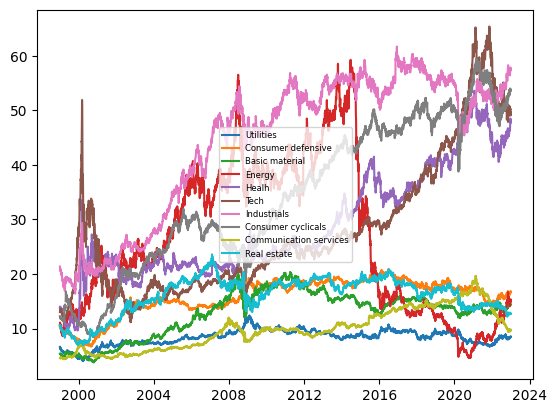

In [ ]:
#assuming equal weighting of all stocks in different sectors
#looking at the historial chart of all Spy and the different sectors

#health stocks
Health_sum = Health.sum(axis = 1)
#Health_sum /=Health_sum[Health_sum.idxmin()]
#tech stocks
tech_sum = tech.sum(axis = 1)
#tech_sum /=tech_sum[tech_sum.idxmin()]

#market
market /=market[market.idxmin()]
market*=100
#Industrials
industry_sum = industry.sum(axis = 1)
ind= '2021-01-18 00:00:00'
#industry_sum = industry_sum.drop(ind)
#industry_sum/=industry_sum[industry_sum.idxmin()]

#consumer_cyclical
consumer_cyclical_sum = consumer_cyclical.sum(axis = 1)
#consumer_cyclical_sum/=consumer_cyclical_sum[consumer_cyclical_sum.idxmin()]

#comm_services
comm_service_sum = comm_service.sum(axis = 1)
#comm_service_sum/=comm_service_sum[comm_service_sum.idxmin()]

#real estate
real_estate_sum = real_estate.sum(axis = 1)

#energy
e_nergy_sum = e_nergy.sum(axis = 1)

#basic materials
basic_list_sum = basic_materials.sum(axis = 1)

#consumer defensive
consumer_defensive_sum = consumer_defensive.sum(axis = 1)

#utilities
util_ities_sum = util_ities.sum(axis = 1)

data = {'Utilities':util_ities_sum/market,'Consumer defensive': consumer_defensive_sum/market,'Basic material':basic_list_sum/market,'Energy': e_nergy_sum/market,'Healh': Health_sum/market, 'Tech': tech_sum/market, 'Industrials':industry_sum/market, 'Consumer cyclicals':consumer_cyclical_sum/market, 'Communication services':comm_service_sum/market, 'Real estate':real_estate_sum/market}


df = pd.DataFrame(data)
plt.plot(df.index, df.values)
plt.legend(df.columns, loc = 'center', prop = {'size':6})


#plt.yscale('log')

plt.show()



In [ ]:
'''
1. As we can see in the above chart not many sectors are able to outperform
the general market
2. Over the 13 year period that we analyzed, only a select sectors outperformed
(Tech, Health, Consumer cyclicals, Industrials)
3. Over this period Energy stocks did the worst
'''

'\n1. As we can see in the above chart not many sectors are able to outperform\nthe general market\n2. Over the 13 year period that we analyzed, only a select sectors outperformed\n(Tech, Health, Consumer cyclicals, Industrials)\n3. Over this period Energy stocks did the worst\n'

In [ ]:

change_yoy = df.resample('Y').last().pct_change()*100

avg_returns = change_yoy.mean()
avg_returns = avg_returns.sort_values(ascending = False)
avg_returns

Healh                     8.618388
Consumer cyclicals        8.301705
Spy                       5.871768
Basic material            5.456045
Industrials               5.215254
Energy                    4.837988
Consumer defensive        3.941212
Tech                      3.753264
Utilities                 3.685814
Communication services    3.374037
Real estate               3.312871
Month                     0.000000
Seasonal_Component             NaN
dtype: float64

In [ ]:
df['Spy'] =market
corr = df.corr().unstack().sort_values(ascending = True)
corr = corr[corr.index.get_level_values(0)!=corr.index.get_level_values(1)]

greater_8 = corr[corr.values>0.8]
greater_8



Communication services  Industrials               0.807992
Industrials             Communication services    0.807992
Consumer defensive      Utilities                 0.819496
Utilities               Consumer defensive        0.819496
Tech                    Communication services    0.822599
Communication services  Tech                      0.822599
Consumer defensive      Basic material            0.823690
Basic material          Consumer defensive        0.823690
                        Utilities                 0.827670
Utilities               Basic material            0.827670
Consumer defensive      Industrials               0.859150
Industrials             Consumer defensive        0.859150
Consumer cyclicals      Industrials               0.862765
Industrials             Consumer cyclicals        0.862765
Communication services  Healh                     0.884958
Healh                   Communication services    0.884958
Consumer cyclicals      Healh                     0.8929

In [ ]:
no_corr = corr[(-0.05<corr.values) & (corr.values<0.05)]
no_corr

Spy          Utilities     -0.039663
Utilities    Spy           -0.039663
Spy          Real estate   -0.035821
Real estate  Spy           -0.035821
Tech         Utilities     -0.014840
Utilities    Tech          -0.014840
dtype: float64

In [ ]:
negative_corr = corr[corr.values<-0.5]
negative_corr

Spy     Energy   -0.563990
Energy  Spy      -0.563990
Tech    Energy   -0.537985
Energy  Tech     -0.537985
dtype: float64

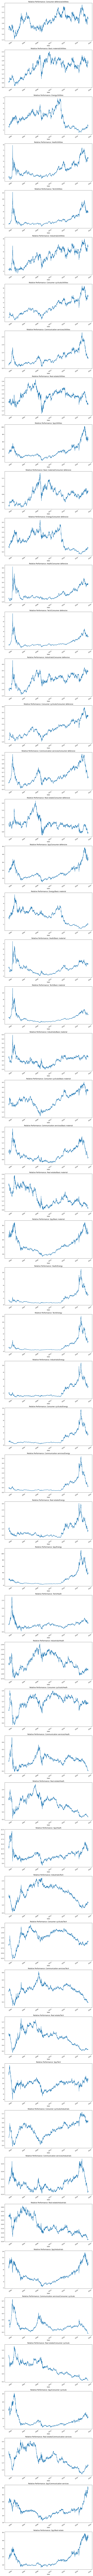

In [ ]:
#looking at the relative performance across different sectors
#we also look at relative performance against the market(SPY)

columns = df.columns

# Calculate the total number of combinations
num_combinations = len(columns) * (len(columns) - 1) // 2

# Create subplots based on the number of combinations
fig, axes = plt.subplots(nrows=num_combinations, ncols=1, figsize=(10, 5*num_combinations))

# Flatten axes if only one combination is there
if num_combinations == 1:
    axes = [axes]

# Plot each combination in separate subplots
plot_index = 0
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        relative_performance = df[col2]/df[col1]
        relative_performance.plot(ax=axes[plot_index])
        axes[plot_index].set_title(f'Relative Performance: {col2}/{col1}')
        plot_index += 1

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import STL



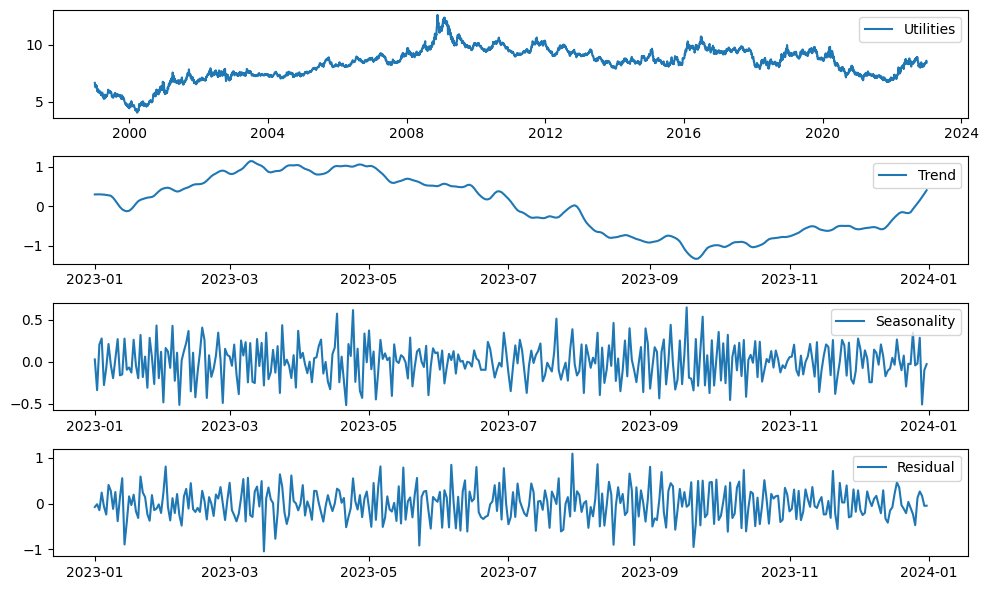

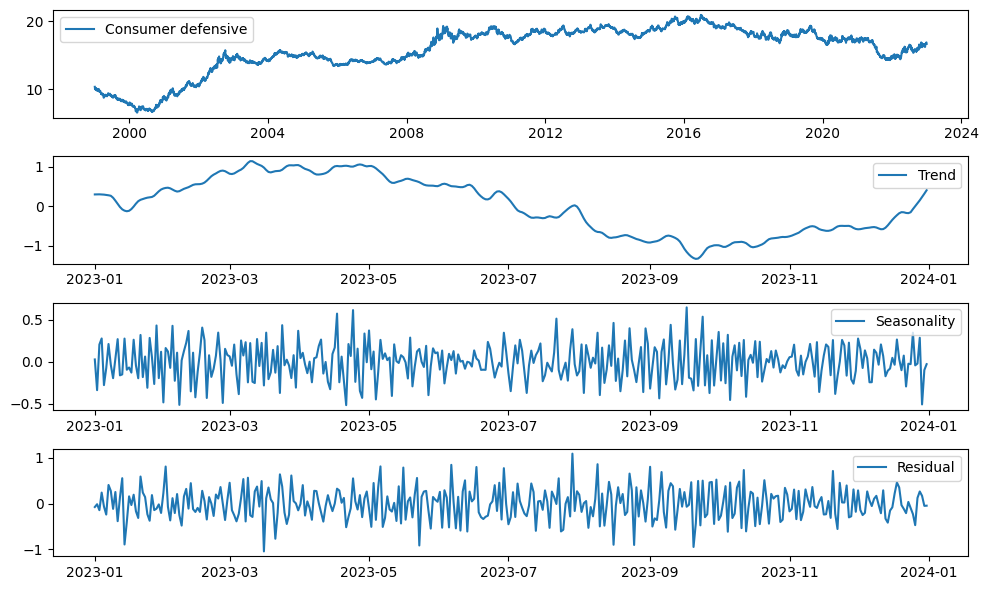

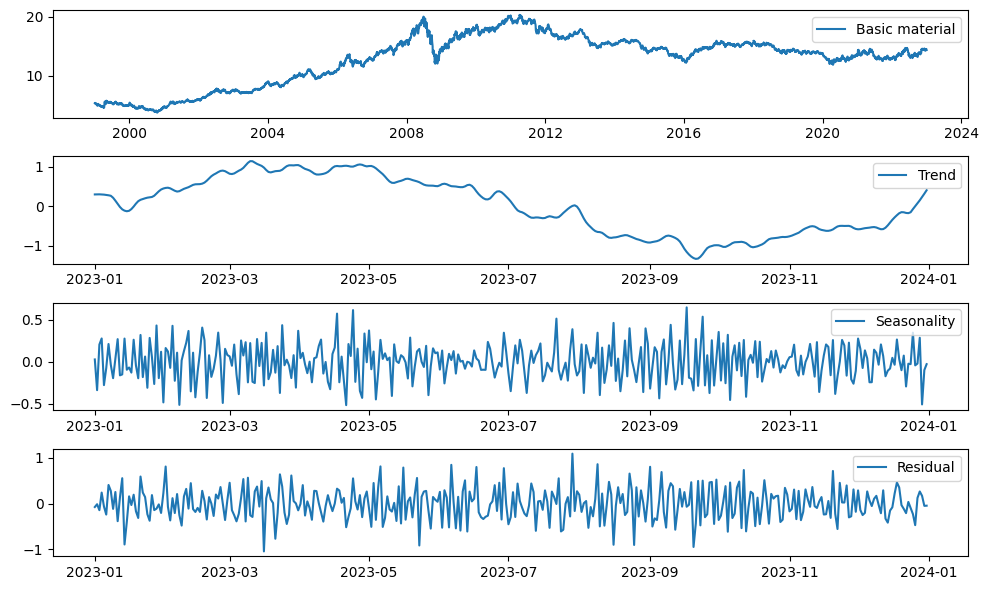

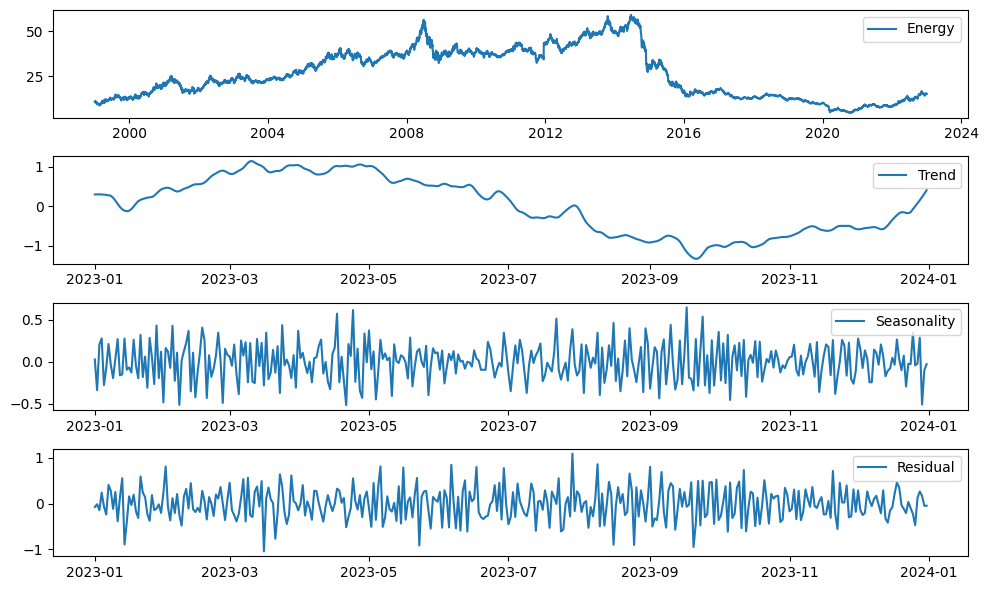

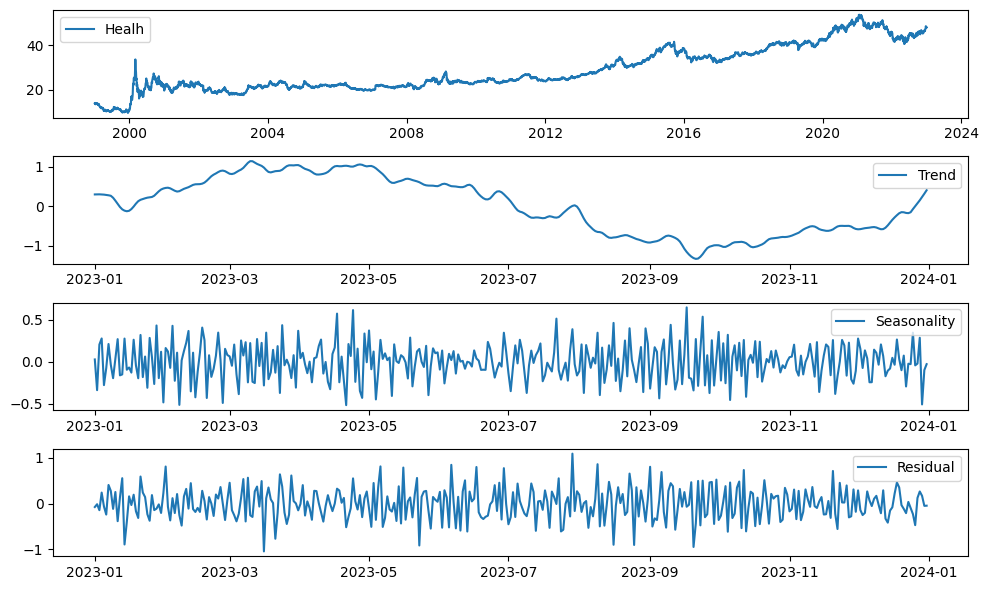

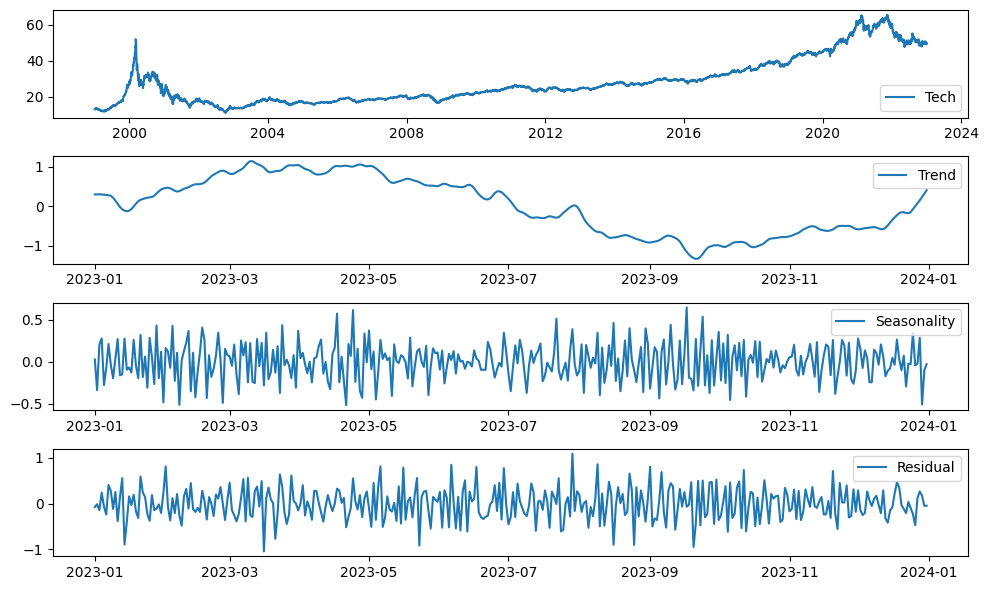

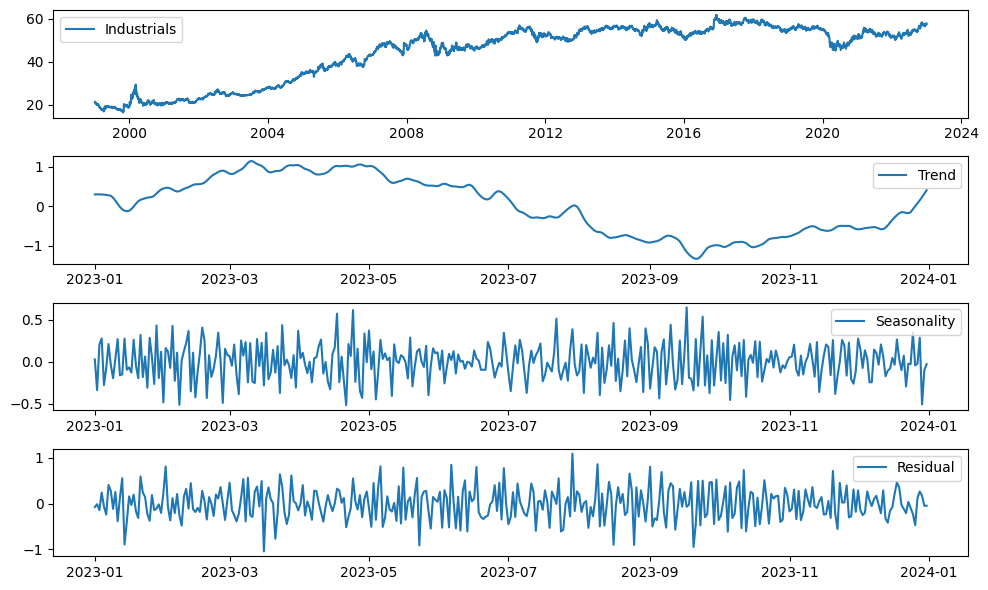

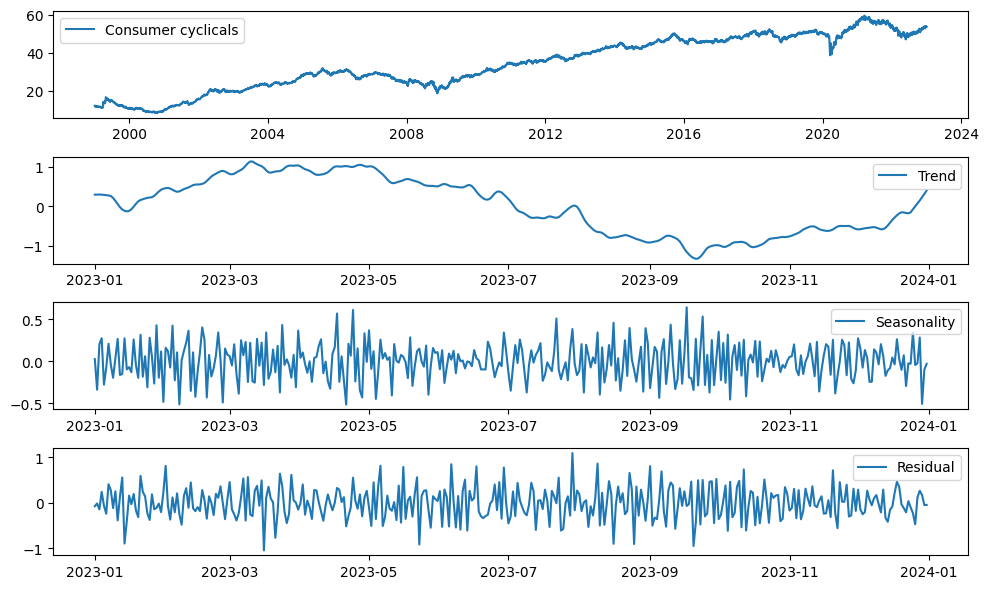

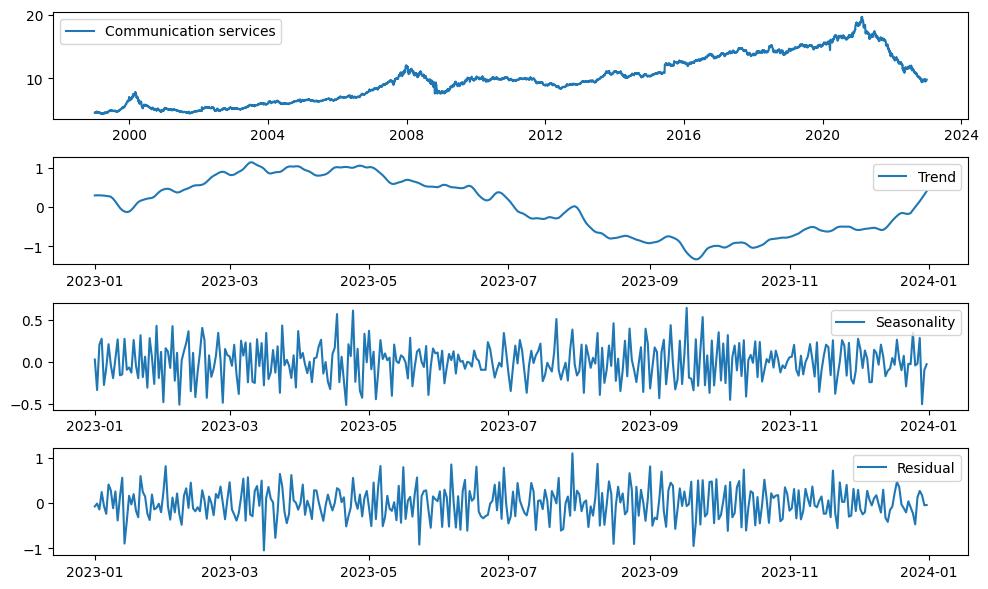

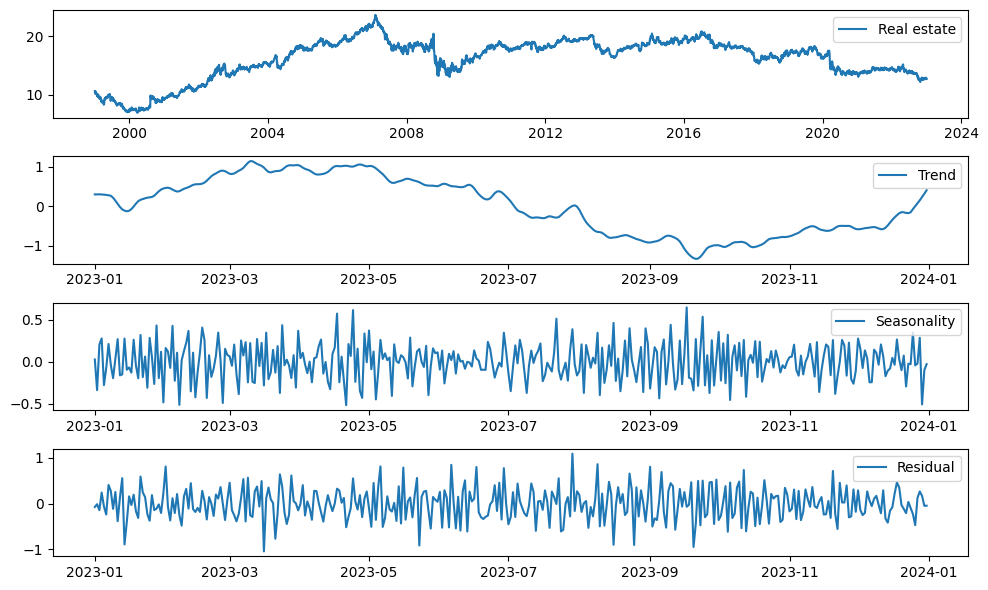

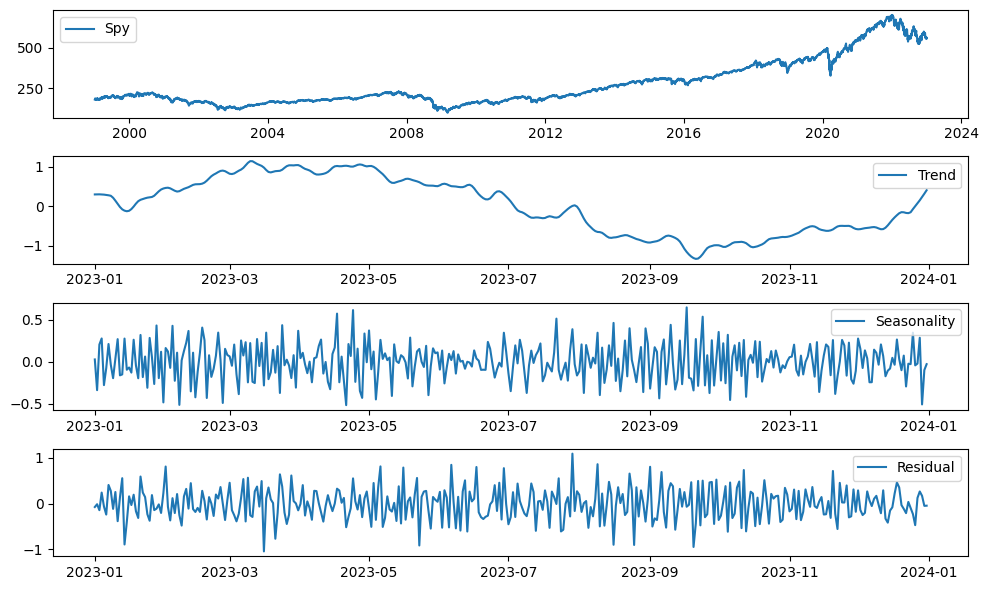

In [ ]:
def plotting(columns, h_series, trend, seasonal, residual):
    plt.figure(figsize=(10, 6))
    plt.subplot(4, 1, 1)
    plt.plot(h_series, label=columns)
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonality')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

def seasonality(columns):
    h = df[columns].tolist()

    dates = df.index.tolist()

    h_series = pd.Series(h, index = pd.to_datetime(dates))

    stl = STL(time_series)
    result = stl.fit()
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid
    plotting(columns, h_series, trend, seasonal, residual)
    


lst = df.columns.tolist()

for val in lst:
    seasonality(val)
    

In [ ]:
h = df['Spy'].tolist()

dates = df.index.tolist()

h_series = pd.Series(h, index = pd.to_datetime(dates))
stl = STL(time_series)
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid

print(seasonal.index)



DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')


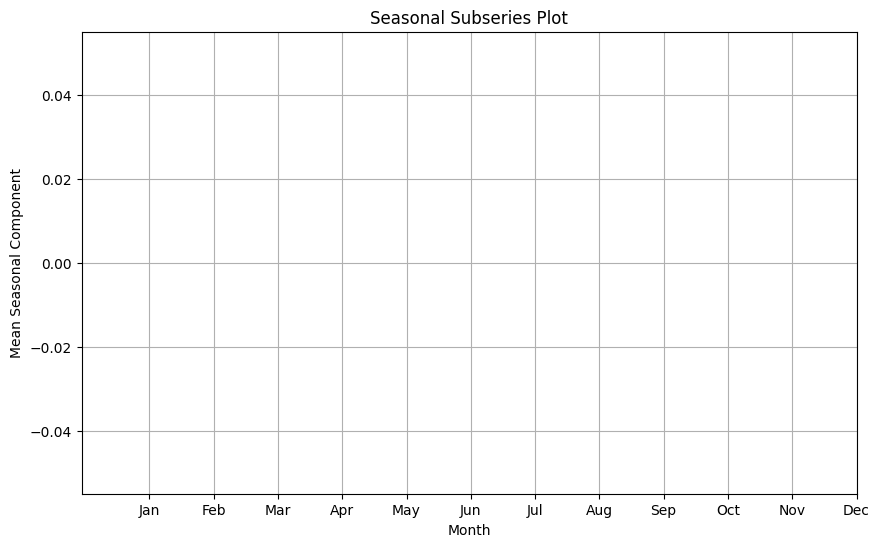

In [ ]:
h = df['Consumer defensive'].tolist()

dates = df.index.tolist()

h_series = pd.Series(h, index = pd.to_datetime(dates))

stl = STL(time_series)
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Add the seasonal component to the original DataFrame 'df' as a new column 'Seasonal_Component'
df['Seasonal_Component'] = seasonal

# Group the data by the month and calculate the mean of the seasonal component within each month
df['Month'] = df.index.month
seasonal_subseries = df.groupby('Month')['Seasonal_Component'].mean()

# Create the seasonal subseries plot
plt.figure(figsize=(10, 6))
plt.plot(seasonal_subseries.index, seasonal_subseries.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Mean Seasonal Component')
plt.title('Seasonal Subseries Plot')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()